# Enfoque clásico de series de tiempo

**Estadística Aplicada**\
**Alejandro Hernández Cerda 1903855**\
**Sesión 14-14 Mar 2023**

De acuerdo con el enfoque clásico de una serie, puede tener 4 componentes:
1. Tendencia
2. Estacional
3. Ciclico
4. Irregular

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
## Librerias de Series
from statsmodels.tsa.api import seasonal_decompose

In [5]:
confirmados = pd.read_excel('covid_mes.xlsx')
confirmados.head()

,fecha,aguascalientes,baja california,baja california sur,campeche,chiapas,chihuahua,distrito federal,coahuila,colima,...,san luis potosi,sinaloa,sonora,tabasco,tamaulipas,tlaxcala,veracruz,yucatan,zacatecas,nacional
0,2020-02-26,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2020-02-27,0,0,0,0,0,0,2,0,0,...,0,0,0,0,0,0,0,0,0,4
2,2020-02-28,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,2
3,2020-02-29,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
4,2020-03-01,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2


In [6]:
type(confirmados['fecha'])

pandas.core.series.Series

In [7]:
confirmados['fecha']=pd.to_datetime(confirmados['fecha'])

In [11]:
confirmados = confirmados.set_index('fecha')

In [14]:
confirmados.index.freq='D'

In [15]:
confirmados.index

DatetimeIndex(['2020-02-26', '2020-02-27', '2020-02-28', '2020-02-29',
               '2020-03-01', '2020-03-02', '2020-03-03', '2020-03-04',
               '2020-03-05', '2020-03-06',
               ...
               '2023-03-03', '2023-03-04', '2023-03-05', '2023-03-06',
               '2023-03-07', '2023-03-08', '2023-03-09', '2023-03-10',
               '2023-03-11', '2023-03-12'],
              dtype='datetime64[ns]', name='fecha', length=1111, freq='D')

Siempre debemos graficar la serie, claro está, despues de hacer nuestro index la fecha.

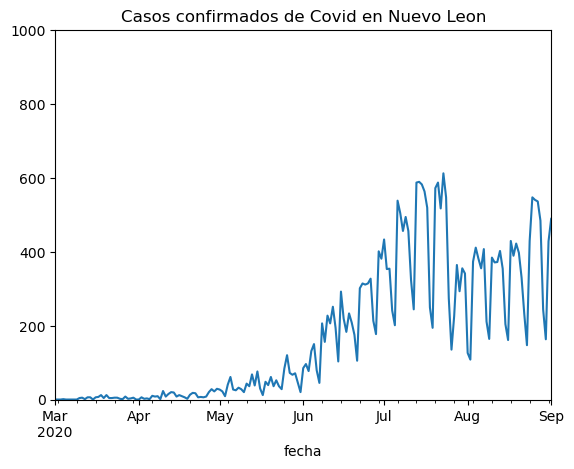

In [20]:
confirmados['nuevo leon'].plot()
plt.title('Casos confirmados de Covid en Nuevo Leon')
plt.xlim('2020-03','2020-09')
plt.ylim(0,1000)
plt.show()

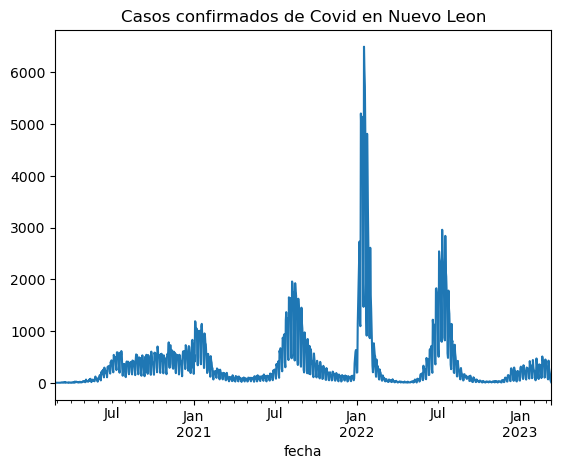

In [21]:
confirmados['nuevo leon'].plot()
plt.title('Casos confirmados de Covid en Nuevo Leon')
plt.show()

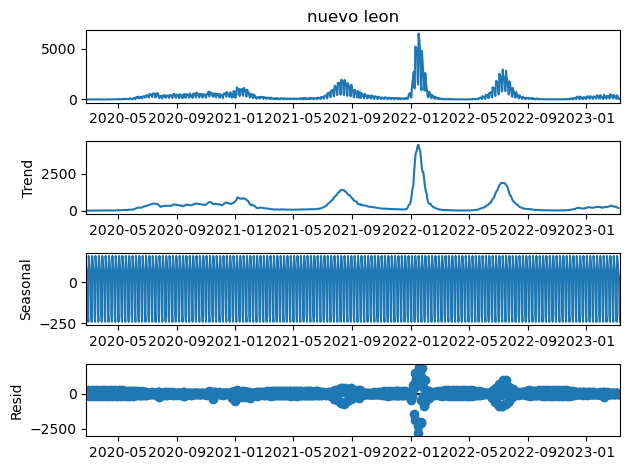

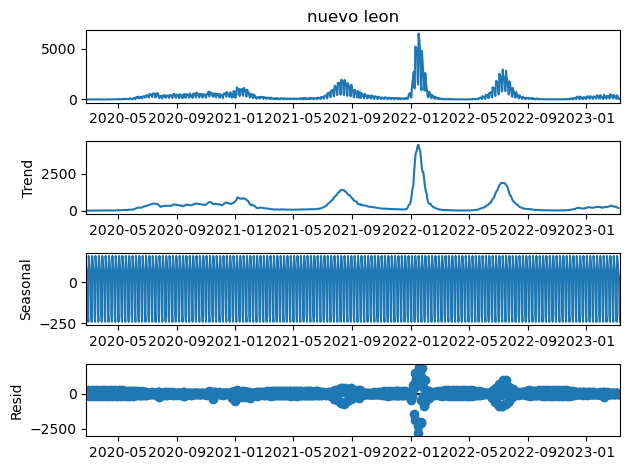

In [27]:
cv_nl=seasonal_decompose(confirmados['nuevo leon'],model='Ad')
## Modelo ETS(Erro-Trend-seasonaly)
## modelo de tendencia-estacional-irregular
cv_nl.plot()

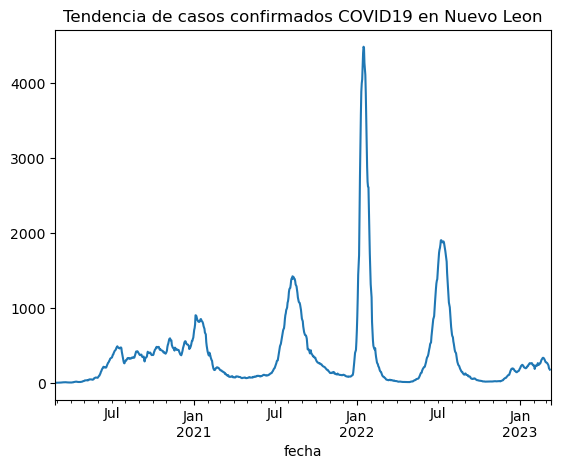

In [28]:
cv_nl.trend.plot()
plt.title('Tendencia de casos confirmados COVID19 en Nuevo Leon')
plt.show()

In [29]:
cv_nl.seasonal.head(10)

fecha
2020-02-26     84.392443
2020-02-27     54.877976
2020-02-28     26.227621
2020-02-29   -201.151861
2020-03-01   -241.946617
2020-03-02    158.510888
2020-03-03    119.089550
2020-03-04     84.392443
2020-03-05     54.877976
2020-03-06     26.227621
Freq: D, Name: seasonal, dtype: float64

# Métodos de Suavizamiento
Los modelos de suavizamiento tratan de extraer la tendencia (tendencia-ciclo)

# Promedio mobila (MA mooving average)

In [32]:
nuevo_leon = confirmados[['nuevo leon']]
nuevo_leon


,nuevo leon
fecha,
2020-02-26,0
2020-02-27,0
2020-02-28,0
2020-02-29,0
2020-03-01,0
...,...
2023-03-08,235
2023-03-09,180
2023-03-10,60


In [33]:
nuevo_leon['desestacionalizada']=nuevo_leon['nuevo leon']-cv_nl.seasonal

C:\Users\Alejandro Hernández\AppData\Local\Temp\ipykernel_7780\700712773.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nuevo_leon['desestacionalizada']=nuevo_leon['nuevo leon']-cv_nl.seasonal


<AxesSubplot:xlabel='fecha'>

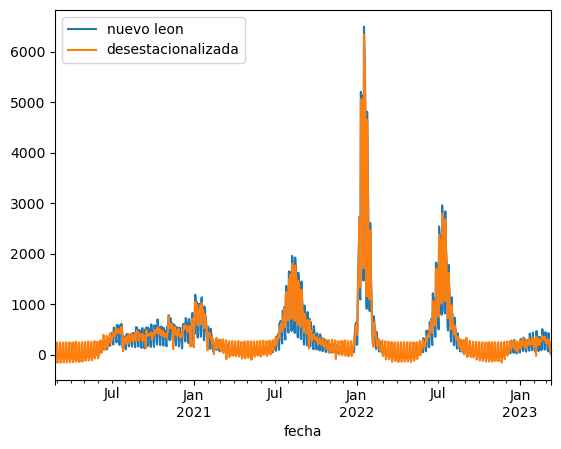

In [36]:
nuevo_leon.plot()

In [40]:
nuevo_leon['PMS-7'] = nuevo_leon['nuevo leon'].rolling(window=7).mean()
nuevo_leon['PMS-15'] = nuevo_leon['nuevo leon'].rolling(window=15).mean()

C:\Users\Alejandro Hernández\AppData\Local\Temp\ipykernel_7780\1309475597.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nuevo_leon['PMS-7'] = nuevo_leon['nuevo leon'].rolling(window=7).mean()
C:\Users\Alejandro Hernández\AppData\Local\Temp\ipykernel_7780\1309475597.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nuevo_leon['PMS-15'] = nuevo_leon['nuevo leon'].rolling(window=15).mean()


In [42]:
nuevo_leon.head(15)

,nuevo leon,desestacionalizada,PMS-7,PMS-15
fecha,,,,
2020-02-26,0,-84.392443,NaN,NaN
2020-02-27,0,-54.877976,NaN,NaN
2020-02-28,0,-26.227621,NaN,NaN
2020-02-29,0,201.151861,NaN,NaN
2020-03-01,0,241.946617,NaN,NaN
2020-03-02,0,-158.510888,NaN,NaN
2020-03-03,0,-119.089550,0.000000,NaN
2020-03-04,1,-83.392443,0.142857,NaN
2020-03-05,0,-54.877976,0.142857,NaN


In [45]:
nuevo_leon['PMC-7'] = nuevo_leon['nuevo leon'].rolling(window=7,center=True).mean()
nuevo_leon

C:\Users\Alejandro Hernández\AppData\Local\Temp\ipykernel_7780\3021240962.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nuevo_leon['PMC-7'] = nuevo_leon['nuevo leon'].rolling(window=7,center=True).mean()


,nuevo leon,desestacionalizada,PMS-7,PMS-15,PMC-7
fecha,,,,,
2020-02-26,0,-84.392443,NaN,NaN,NaN
2020-02-27,0,-54.877976,NaN,NaN,NaN
2020-02-28,0,-26.227621,NaN,NaN,NaN
2020-02-29,0,201.151861,NaN,NaN,0.000000
2020-03-01,0,241.946617,NaN,NaN,0.142857
...,...,...,...,...,...
2023-03-08,235,150.607557,241.857143,278.600000,182.857143
2023-03-09,180,125.122024,226.142857,263.533333,174.857143
2023-03-10,60,33.772379,192.142857,240.600000,NaN


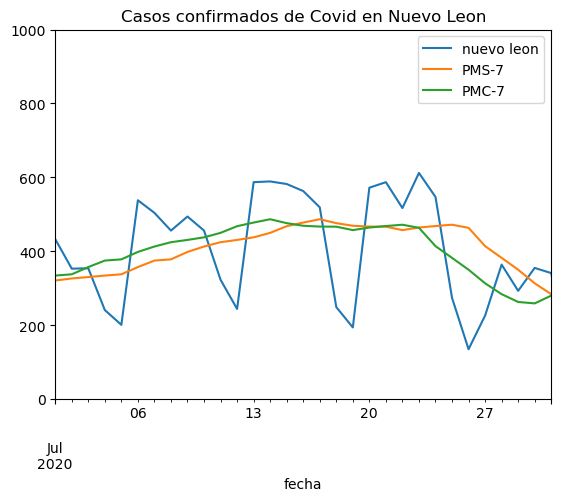

In [47]:
nuevo_leon[['nuevo leon','PMS-7','PMC-7']].plot()
plt.title('Casos confirmados de Covid en Nuevo Leon')
plt.xlim('2020-07-01','2020-07-31')
plt.ylim(0,1000)
plt.show()

1. Importen la base de datos de vuelos de pasajeros de ayer
2. Calcule el promedio móvil a 3 y 7 meses
3. Calcule el promedio móvil centrado a 3 y 7 meses

In [67]:
pasajeros = pd.read_csv('airline_passengers.csv',index_col='Month', parse_dates=True)
pasajeros = pasajeros.rename(columns={'Thousands of Passengers':'miles de pasajeros'})
pasajeros

,miles de pasajeros
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1960-08-01,606
1960-09-01,508
1960-10-01,461


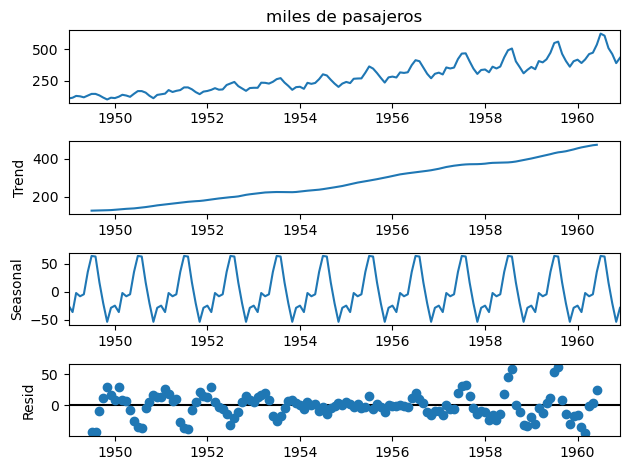

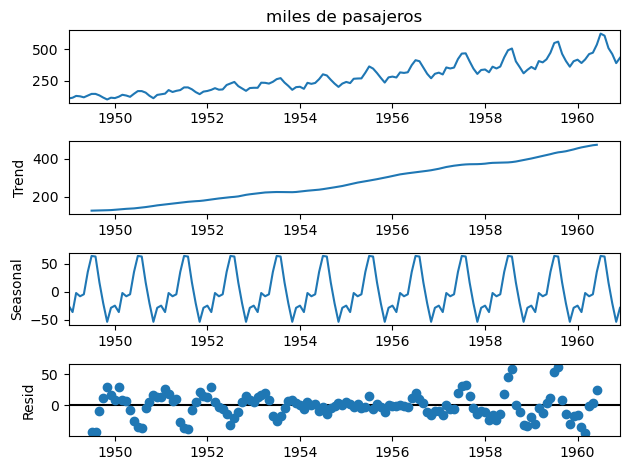

In [70]:
Serie1 = seasonal_decompose(pasajeros['miles de pasajeros'],model='Ad')
Serie1.plot()

In [76]:
pasajeros['Desestacionalizada']=pasajeros['miles de pasajeros']-Serie1.seasonal
pasajeros['PMS-3']=pasajeros['miles de pasajeros'].rolling(window=3).mean()
pasajeros['PMS-7']=pasajeros['miles de pasajeros'].rolling(window=7).mean()
pasajeros['PMC-3']=pasajeros['miles de pasajeros'].rolling(window=3,center=True).mean()
pasajeros['PMC-7']=pasajeros['miles de pasajeros'].rolling(window=7,center=True).mean()
pasajeros

,miles de pasajeros,Desestacionalizada,PMS-3,PMS-7,PMC-3,PMC-7
Month,,,,,,
1949-01-01,112,136.748737,NaN,NaN,NaN,NaN
1949-02-01,118,154.188131,NaN,NaN,120.666667,NaN
1949-03-01,132,134.241162,120.666667,NaN,126.333333,NaN
1949-04-01,129,137.036616,126.333333,NaN,127.333333,127.857143
1949-05-01,121,125.506313,127.333333,NaN,128.333333,133.000000
...,...,...,...,...,...,...
1960-08-01,606,543.176768,587.666667,500.857143,578.666667,513.428571
1960-09-01,508,491.479798,578.666667,517.571429,525.000000,507.714286
1960-10-01,461,481.642677,525.000000,523.571429,453.000000,NaN


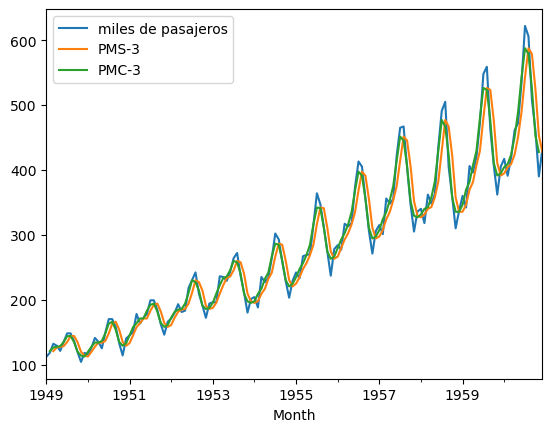

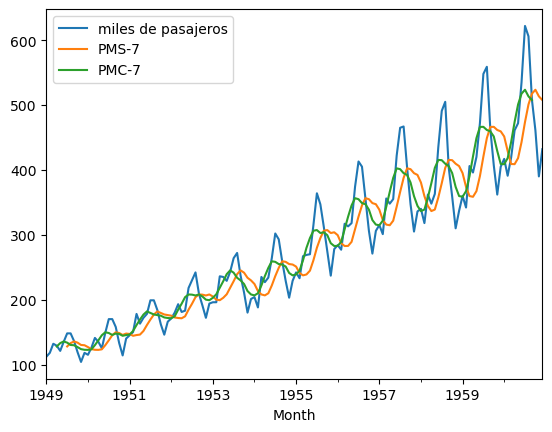

In [78]:
pasajeros[['miles de pasajeros','PMS-3','PMC-3']].plot(label='Promedio movil 3 meses')
pasajeros[['miles de pasajeros','PMS-7','PMC-7']].plot(label='Promedio movil 7 meses')
plt.show()